In [1]:
import pandas as pd

In [3]:
# Remplacer par le chemin de ton fichier
df = pd.read_csv('C:/Users/SAID MEKAOUAR/Downloads/SoGood (1)/SoGood/data/processed/SoGood_CLEAN_FINAL.csv', encoding='latin1')

# Afficher les premières lignes
print(df.head())

C:\Users\SAID MEKAOUAR\AppData\Local\Temp\ipykernel_21124\1893879445.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/SAID MEKAOUAR/Downloads/SoGood (1)/SoGood/data/processed/SoGood_CLEAN_FINAL.csv', encoding='latin1')


        code                                 product_name_clean   brands  \
0  101209159  VÃ©ritable pÃ¢te Ã  tartiner noisettes chocola...  Bovetti   
1  105000011                               Chamomile Herbal Tea   Lagg's   
2  105000042                     Lagg's, herbal tea, peppermint   Lagg's   
3  105000059                                 Linden Flowers Tea   Lagg's   
4  105000073                               Herbal Tea, Hibiscus   Lagg's   

                                          categories nutriscore_grade  \
0  Petit-dÃ©jeuners,Produits Ã  tartiner,Produits...                e   
1                                            Unknown              NaN   
2  Plant-based foods and beverages, Beverages, Ho...              NaN   
3  Beverages and beverages preparations, Plant-ba...              NaN   
4                                            Unknown              NaN   

   nova_group  energy-kcal_100g  fat_100g  sugars_100g  salt_100g  \
0         NaN             617.0    

In [4]:
colonnes_numeriques = [
    'nova_group',
    'energy-kcal_100g',
    'fat_100g',
    'sugars_100g',
    'salt_100g',
    'proteins_100g'
]

for col in colonnes_numeriques:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # remplace erreurs par NaN

# Vérification
print(df[colonnes_numeriques].dtypes)


nova_group          float64
energy-kcal_100g    float64
fat_100g            float64
sugars_100g         float64
salt_100g           float64
proteins_100g       float64
dtype: object


In [5]:
df_clean = df[df['nutriscore_grade'].isin(['a', 'b', 'c', 'd', 'e'])].copy()

print("Distribution des notes nutriscore :")
print(df_clean['nutriscore_grade'].value_counts())


Distribution des notes nutriscore :
nutriscore_grade
e    358337
d    318673
c    258926
a    176675
b    145522
Name: count, dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Étape 1 : conserver uniquement les valeurs valides
valeurs_valides = ['a', 'b', 'c', 'd', 'e']
df_clean = df_clean[df_clean['nutriscore_grade'].isin(valeurs_valides)].copy()

# Étape 2 : encoder proprement
le = LabelEncoder()
df_clean['nutriscore_encoded'] = le.fit_transform(df_clean['nutriscore_grade'])

# Étape 3 : vérification
print("Encodage Nutriscore :", dict(zip(le.classes_, le.transform(le.classes_))))


Encodage Nutriscore : {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}


In [11]:
import sys
print(sys.version)
print(sys.executable)

3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]
c:\Users\SAID MEKAOUAR\AppData\Local\Programs\Python\Python310\python.exe


In [24]:
X = df_clean.drop(columns=['nova_group'])

Accuracy: 0.740055717391218

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.75      0.71     35335
           1       0.64      0.45      0.53     29104
           2       0.66      0.68      0.67     51785
           3       0.73      0.80      0.76     63735
           4       0.87      0.84      0.86     71668

    accuracy                           0.74    251627
   macro avg       0.72      0.70      0.71    251627
weighted avg       0.74      0.74      0.74    251627



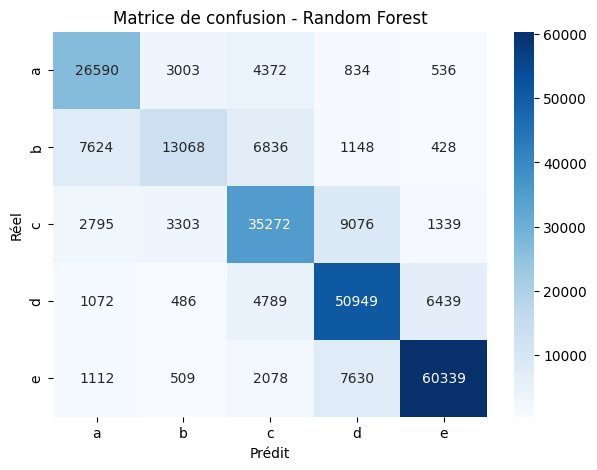

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Variables explicatives (sans nova_group)
X = df_clean[[
    'energy-kcal_100g',
    'fat_100g',
    'sugars_100g',
    'salt_100g',
    'proteins_100g',
]]
y = df_clean['nutriscore_encoded']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Modèle Random Forest
rf = RandomForestClassifier(
    n_estimators=100,       # nombre d'arbres dans la forêt
    max_depth=10,           # profondeur max des arbres (à ajuster)
    random_state=42,
    n_jobs=-1               # pour utiliser tous les coeurs CPU disponibles
)

# Entraînement
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion - Random Forest')
plt.show()


In [31]:
import joblib
import pandas as pd

# Charger le modèle sauvegardé
rf_loaded = joblib.load('C:/Users/SAID MEKAOUAR/Downloads/SoGood (1)/SoGood/models/random_forest_nutriscore.pkl')

# Exemple de nouveaux cas à tester (doivent avoir les mêmes colonnes que X_train)
# Ici, 2 exemples fictifs, avec les mêmes features que ton modèle :
nouveaux_exemples = pd.DataFrame([
    {'energy-kcal_100g': 150, 'fat_100g': 5, 'sugars_100g': 10, 'salt_100g': 0.5, 'proteins_100g': 3},
    {'energy-kcal_100g': 300, 'fat_100g': 15, 'sugars_100g': 20, 'salt_100g': 1.5, 'proteins_100g': 8},
])

# Prédire les classes pour ces nouveaux exemples
predictions = rf_loaded.predict(nouveaux_exemples)

print("Prédictions Nutriscore (encodé) pour les nouveaux cas :", predictions)


Prédictions Nutriscore (encodé) pour les nouveaux cas : [2 3]


In [29]:
import joblib

# Enregistrer le modèle dans un fichier
joblib.dump(rf, 'random_forest_nutriscore.pkl')


['random_forest_nutriscore.pkl']